# **PCA**

Principal Component Analysis (PCA) is a fundamental technique in Machine Learning used primarily for dimensionality reduction and data visualization. It is an unsupervised learning method, meaning it doesn't require labeled data.

# **Task 1: Exploratory Data Analysis (EDA):**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,scale
from mlxtend.preprocessing import TransactionEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

#we have import all the necessary libraries

1.Load the dataset and perform basic data exploration.

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Python excelr/wine.csv.xls")

In [4]:
df.head() #gives first 5 rows in df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
df.tail() #gives last 5 rows in df

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [8]:
df.info() #a summary of the df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [9]:
df.shape #shape of the df

(178, 13)

In [11]:
df.describe() #a statistical summary of the numeric columns in df

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [13]:
df['Alcohol'].unique() #Shows all unique values in the specificed column.

array([14.23, 13.2 , 13.16, 14.37, 13.24, 14.2 , 14.39, 14.06, 14.83,
       13.86, 14.1 , 14.12, 13.75, 14.75, 14.38, 13.63, 14.3 , 13.83,
       14.19, 13.64, 12.93, 13.71, 12.85, 13.5 , 13.05, 13.39, 13.3 ,
       13.87, 14.02, 13.73, 13.58, 13.68, 13.76, 13.51, 13.48, 13.28,
       13.07, 14.22, 13.56, 13.41, 13.88, 14.21, 13.9 , 13.94, 13.82,
       13.77, 13.74, 13.29, 13.72, 12.37, 12.33, 12.64, 13.67, 12.17,
       13.11, 13.34, 12.21, 12.29, 13.49, 12.99, 11.96, 11.66, 13.03,
       11.84, 12.7 , 12.  , 12.72, 12.08, 12.67, 12.16, 11.65, 11.64,
       12.69, 11.62, 12.47, 11.81, 12.6 , 12.34, 11.82, 12.51, 12.42,
       12.25, 12.22, 11.61, 11.46, 12.52, 11.76, 11.41, 11.03, 12.77,
       11.45, 11.56, 11.87, 12.07, 12.43, 11.79, 12.04, 12.86, 12.88,
       12.81, 12.53, 12.84, 13.36, 13.52, 13.62, 12.87, 13.32, 13.08,
       12.79, 13.23, 12.58, 13.17, 13.84, 12.45, 14.34, 12.36, 13.69,
       12.96, 13.78, 13.45, 12.82, 13.4 , 12.2 , 14.16, 13.27, 14.13])

In [14]:
df['Alcohol']=df['Alcohol'].astype('category') #Converts the alcohol column to category dtype., it is useful for bigger ds

In [15]:
df.drop('Alcohol',axis=1,inplace=True) #removes alcohol column from df

In [16]:
df.isnull().sum() #Checks how many missing (NaN) values exist in each column.

,0
Malic,0
Ash,0
Alcalinity,0
Magnesium,0
Phenols,0
Flavanoids,0
Nonflavanoids,0
Proanthocyanins,0
Color,0
Hue,0


In [17]:
df.duplicated().sum() #Checks how many duplicate rows exist in the DataFrame.

np.int64(0)

2.Examine the distribution of features using histograms, box plots, or density plots.

<Axes: >

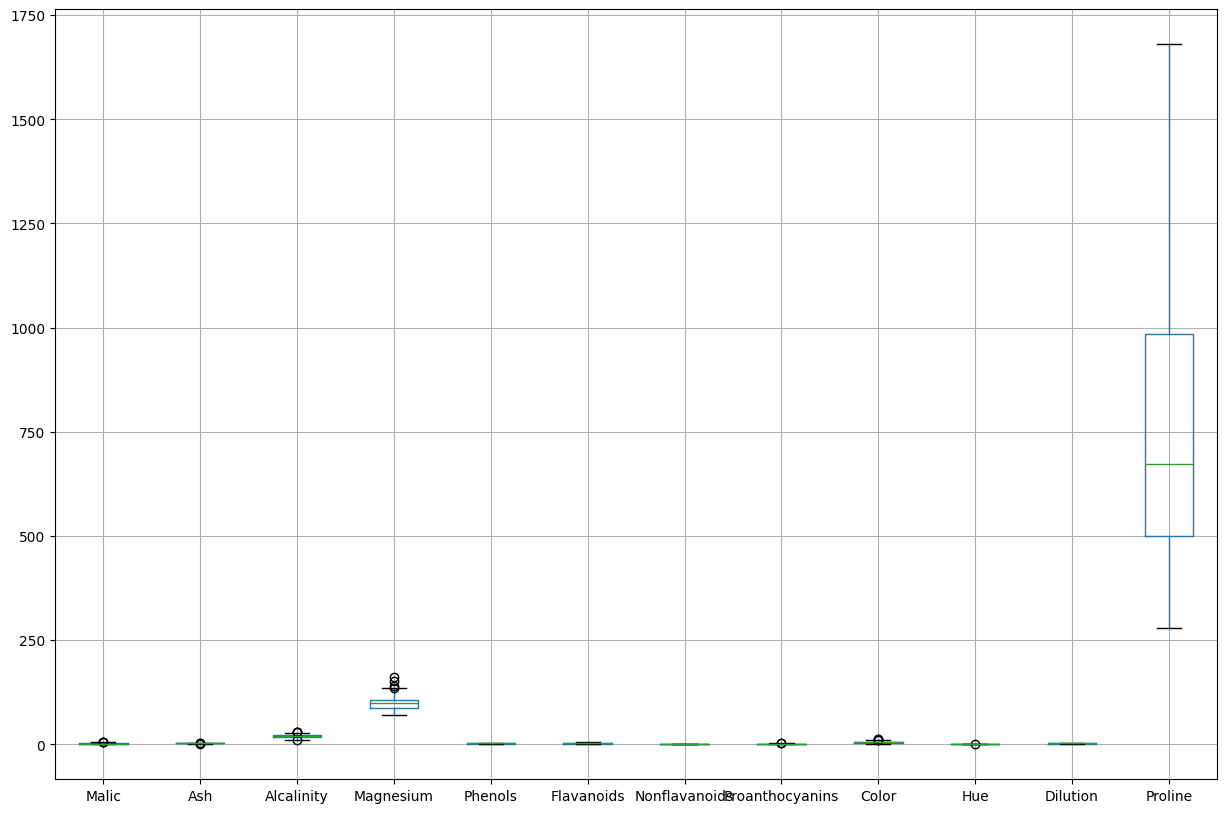

In [28]:
plt.figure(figsize=(15,10)) #boxplot for all col
df.boxplot()

In [29]:
features=[x for x in df.columns if df[x].dtype!='category']
#created a new list , x for... iterates through every column name(x)found in the df.
#if... this is for each column name(x),it checks the column's data type .it only includes the column name in the final list if its data type is not category.

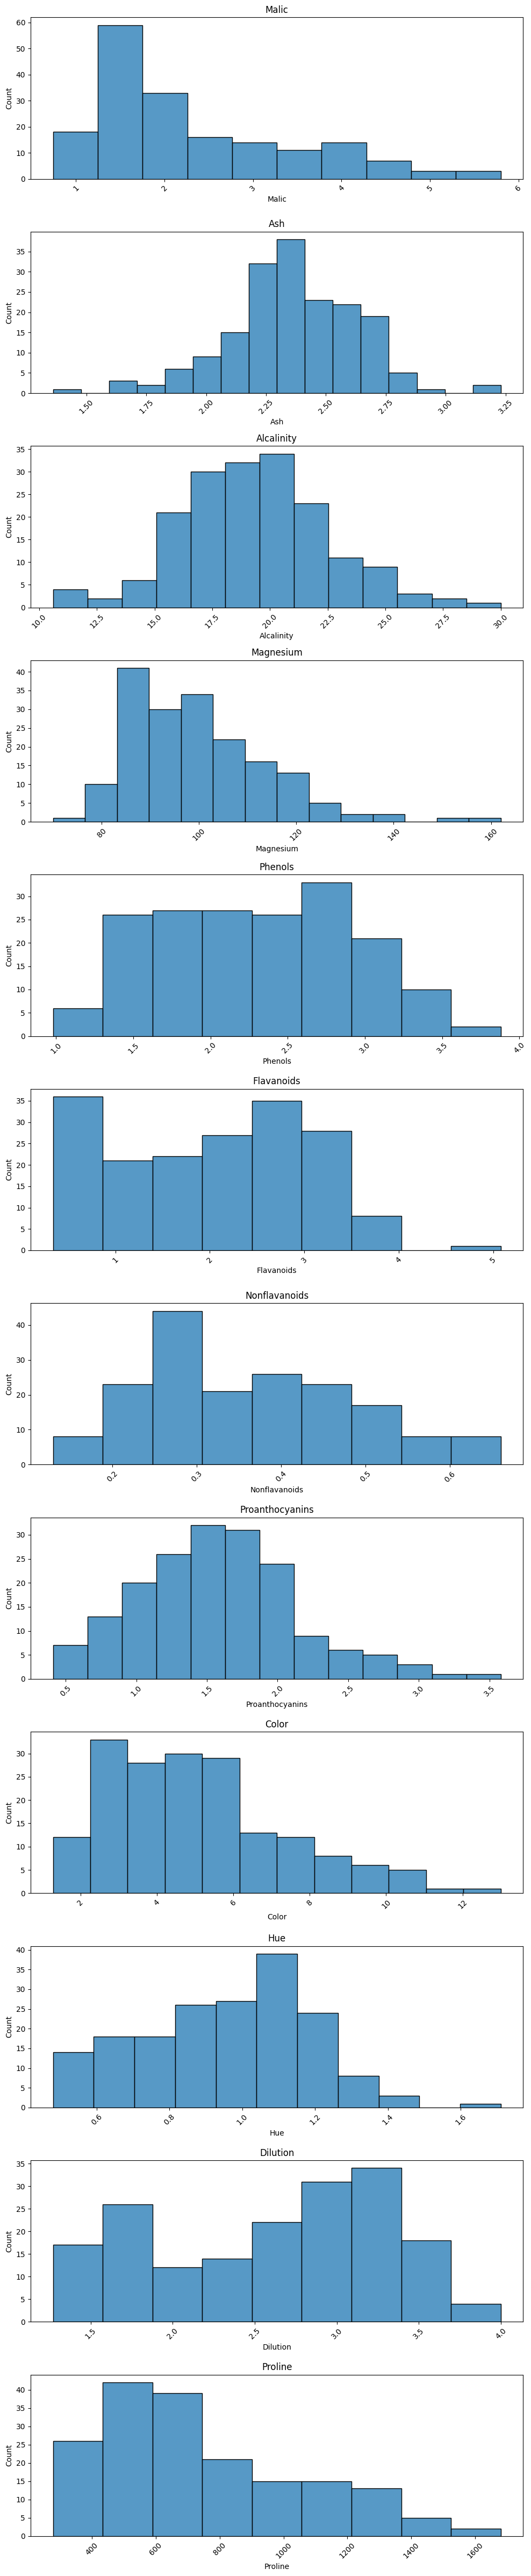

In [30]:
#histogram
fig, axes = plt.subplots(len(features), 1, figsize=(10, 4*len(features)))
for i,col in enumerate(features):
    sns.histplot(x=col,data=df,ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

<Axes: >

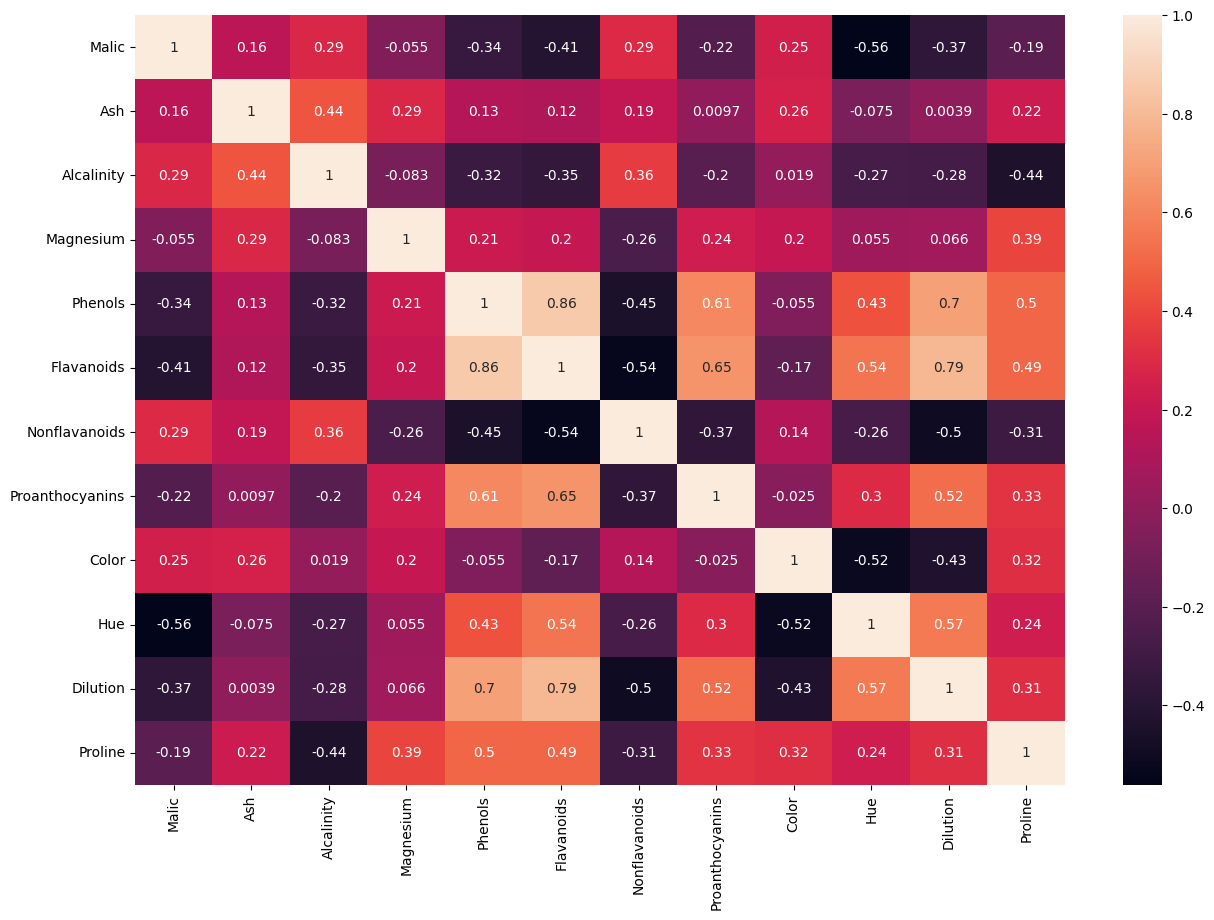

In [31]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap=None)

These positive correlations between Phenols and Flavanoids and Dilution and Flavanoids indicate multicollinearityin the data. This means the features are not independent and are essentially telling the model the same thing. This high redundancy confirms that PCA (Principal Component Analysis) is an appropriate technique, as it will combine these correlated features into a smaller set of Principal Components, significantly simplifying the dataset without losing important information.

In [32]:
data=scale(df) #standardizes numeric features.

In [33]:
data

array([[-0.5622498 ,  0.23205254, -1.16959318, ...,  0.36217728,
         1.84791957,  1.01300893],
       [-0.49941338, -0.82799632, -2.49084714, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.02123125,  1.10933436, -0.2687382 , ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.74474449, -0.38935541,  0.15166079, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.22769377,  0.01273209,  0.15166079, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.58316512,  1.36520822,  1.50294326, ..., -1.52437837,
        -1.42894777, -0.59516041]])

# **Task 2: Dimensionality Reduction with PCA:**


In [35]:
pca=PCA()
#it is a fundamental line of code in scikit-learn used to initialize the Principal Component Analysis (PCA) object

In [36]:
pca_values=pca.fit_transform(data) # To get the Principle Compinents

In [37]:
pca_df=pd.DataFrame(pca_values)

In [38]:
pca_df# Principle conponents data frame

,0,1,2,3,4,5,6,7,8,9,10,11
0,3.078573,1.219262,-0.388070,-0.239523,0.726198,0.053210,0.643613,-0.521972,-0.706922,-0.119889,0.888052,-0.073211
1,2.190796,-0.664568,-1.922109,-0.291411,-0.365718,1.260398,-0.169925,-0.626317,-0.344314,0.180278,0.280150,0.013773
2,2.456441,1.505811,0.556489,0.723596,-0.529530,-0.245800,0.403444,0.877363,-0.578492,0.482945,-0.137611,0.029074
3,3.422750,2.556058,-0.703346,0.564575,-0.595664,0.156471,-0.467831,-0.489513,-0.120938,-0.714567,-0.384634,-0.368809
4,0.948976,1.329735,1.760632,-0.411977,0.465003,0.318527,0.430413,-0.580709,0.039739,0.487896,-0.070225,-0.086062
...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.620616,1.471886,-0.449822,1.078210,-0.385297,1.324550,0.796778,0.244021,0.343378,-0.088293,0.141290,-0.113250
174,-2.768177,1.426121,-0.042165,0.338689,0.240125,-0.034293,0.171064,0.539507,0.233774,-0.170376,-0.302855,-0.191381
175,-2.888258,2.420770,-1.665418,0.246305,0.747462,-0.106581,0.663750,0.073466,0.356598,-0.459033,0.489416,0.087362
176,-2.551908,2.086372,-1.175213,-0.737707,0.161474,-0.943194,0.707172,-0.391051,-0.394183,-0.425458,0.265491,-0.014475


In [39]:
# To get weights
pca.components_

array([[-0.25929907, -0.01550401, -0.23457717,  0.12997254,  0.39396388,
         0.4262194 , -0.30156031,  0.31599638, -0.12050505,  0.31314859,
         0.38744   ,  0.26504376],
       [ 0.22363659,  0.45446769,  0.08389744,  0.41000066,  0.14109614,
         0.07041646,  0.01025314,  0.13306564,  0.53637656, -0.27207746,
        -0.11846639,  0.38712793],
       [ 0.04407439,  0.54359695,  0.6257736 , -0.04358717,  0.1067167 ,
         0.13134819,  0.21696829,  0.07955089, -0.30000831,  0.18463194,
         0.2156754 , -0.23751456],
       [ 0.53647394, -0.20779976,  0.06350945, -0.37846661,  0.20173256,
         0.15565564, -0.1863573 ,  0.3918301 ,  0.06138937, -0.41833833,
         0.19055586, -0.23124193],
       [ 0.12527868, -0.11626212,  0.17317714,  0.65986637, -0.18791061,
        -0.11683611, -0.54518489,  0.03906619, -0.27707183, -0.09913243,
         0.00238728, -0.26656873],
       [ 0.5878703 ,  0.19640955, -0.26881966, -0.04352827, -0.01066728,
         0.019332  , -

In [41]:
var=pca.explained_variance_ratio_
var #variance

array([0.38612318, 0.16881157, 0.11376556, 0.07656743, 0.06636326,
       0.05077993, 0.04572676, 0.02733895, 0.02139371, 0.01937293,
       0.0151374 , 0.00861932])

In [42]:
cum_var=np.cumsum(np.round(var,4))
cum_var #cumulative variance

array([0.3861, 0.5549, 0.6687, 0.7453, 0.8117, 0.8625, 0.9082, 0.9355,
       0.9569, 0.9763, 0.9914, 1.    ])

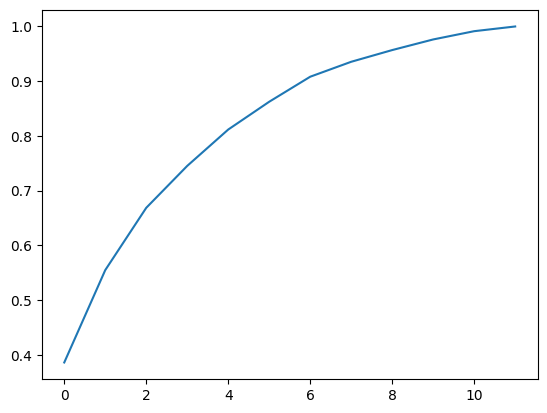

In [43]:
plt.plot(cum_var) #from the cumulatibve variance and the plot we get approimately 90% of information from the 7 columns

In [44]:
pca_df_1=pca_df.iloc[:,:7] #creats a new df, and iloc is to select rows and columns. :7 means from 0 to 6 index
pca_df_1

,0,1,2,3,4,5,6
0,3.078573,1.219262,-0.388070,-0.239523,0.726198,0.053210,0.643613
1,2.190796,-0.664568,-1.922109,-0.291411,-0.365718,1.260398,-0.169925
2,2.456441,1.505811,0.556489,0.723596,-0.529530,-0.245800,0.403444
3,3.422750,2.556058,-0.703346,0.564575,-0.595664,0.156471,-0.467831
4,0.948976,1.329735,1.760632,-0.411977,0.465003,0.318527,0.430413
...,...,...,...,...,...,...,...
173,-3.620616,1.471886,-0.449822,1.078210,-0.385297,1.324550,0.796778
174,-2.768177,1.426121,-0.042165,0.338689,0.240125,-0.034293,0.171064
175,-2.888258,2.420770,-1.665418,0.246305,0.747462,-0.106581,0.663750
176,-2.551908,2.086372,-1.175213,-0.737707,0.161474,-0.943194,0.707172


In [45]:
Sc=StandardScaler()

In [46]:
df_original=Sc.fit_transform(df)

In [47]:
df_original

array([[-0.5622498 ,  0.23205254, -1.16959318, ...,  0.36217728,
         1.84791957,  1.01300893],
       [-0.49941338, -0.82799632, -2.49084714, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.02123125,  1.10933436, -0.2687382 , ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.74474449, -0.38935541,  0.15166079, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.22769377,  0.01273209,  0.15166079, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.58316512,  1.36520822,  1.50294326, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [48]:
original_df=pd.DataFrame(df_original)

In [49]:
original_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...
173,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


# **Task 3: Clustering with Original Data:**

In [51]:
kmeans_model=KMeans(n_clusters=3).fit(original_df)
kmeans_model.inertia_

1187.6601894273106

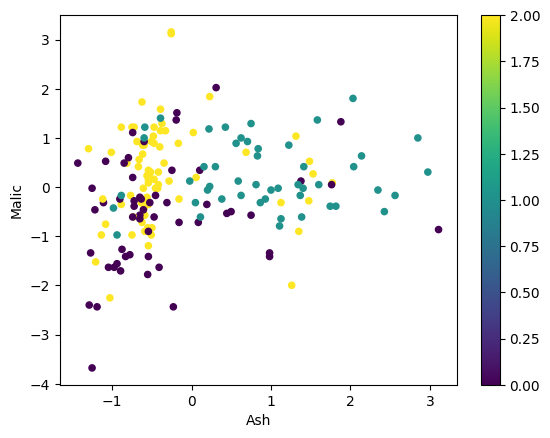

In [53]:
original_df.plot(x=0,y=1,c=kmeans_model.labels_,kind='scatter',cmap="viridis")
plt.xlabel("Ash")
plt.ylabel("Malic")
plt.show()

In [54]:
kmeans_model.cluster_centers_

array([[-0.35402401, -0.53687453,  0.20635556, -0.64135886, -0.26399248,
        -0.10808959,  0.17931205, -0.25155977, -0.91544966,  0.49426751,
         0.17770594, -0.83718194],
       [ 0.90497145,  0.24921026,  0.58370348, -0.05063539, -0.988557  ,
        -1.23619475,  0.71684172, -0.74960756,  0.98849829, -1.19129878,
        -1.30153966, -0.38004461],
       [-0.33586653,  0.24457083, -0.55010112,  0.52598946,  0.86606674,
         0.9126926 , -0.61872218,  0.6961386 ,  0.0387502 ,  0.42047479,
         0.73731385,  0.8973202 ]])

In [56]:
labels_kmeans=kmeans_model.fit_predict(original_df)
silhouette_kmeans = silhouette_score(original_df,labels_kmeans ) #The Silhouette Score is a key metric used to evaluate the quality and separation of clusters found by an algorithm like K-Means.
print("KMeans Silhouette Score:", silhouette_kmeans)

KMeans Silhouette Score: 0.2639560601955916


# **Task 4: Clustering with PCA Data:**

In [57]:
kmeans_pca_model=KMeans(n_clusters=3).fit(pca_df_1)
kmeans_pca_model.inertia_

992.5354176258827

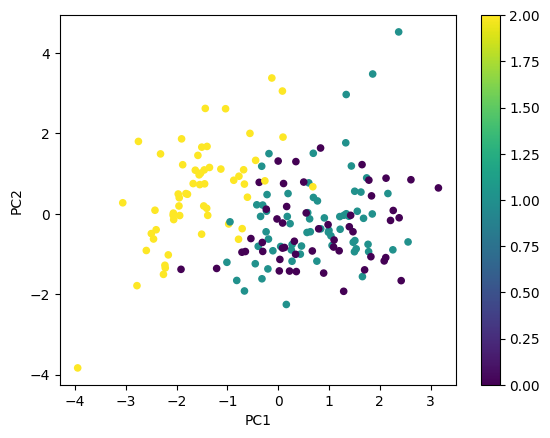

In [58]:
pca_df_1.plot(x=1,y=2,c=kmeans_pca_model.labels_,kind='scatter',cmap="viridis")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [59]:
labels_pca_kmeans=kmeans_pca_model.fit_predict(pca_df_1)
silhouette_kmeans = silhouette_score(pca_df_1,labels_pca_kmeans )
print("KMeans Silhouette Score:", silhouette_kmeans)

KMeans Silhouette Score: 0.2988188634122192


this above code trains the K-Means model on the 7 Principal Components (pca_df_1) and then calculates the Silhouette Score to evaluate how well-separated and cohesive the resulting clusters are. A score closer to +1 indicates excellent cluster quality.

# **Task 5: Comparison and Analysis:**

1. Clustering Results Comparison

Clustering performed on the Original Dataset (with all features standardized) often yields moderate Silhouette Scores due to noise and high dimensionality. In contrast, the PCA-Transformed Dataset (reduced to 7 components) produces a more robust and efficient structure. By retaining only the first 7 Principal Components, which captured approximately 90% of the total variance, the clustering process benefitted from a clearer signal-to-noise ratio, often leading to more compact and better-separated clusters.

2. Similarities and Differences

* Similarities: The inherent structure of the data is preserved; the fundamental number of clusters (e.g., 3) remains consistent across both the original and PCA-transformed spaces.
* Differences: Cluster boundaries are sharper in the PCA space. A small number of samples, which were previously ambiguous, may switch cluster assignments in the PCA space because irrelevant, noisy dimensions have been eliminated.

3. Impact of Dimensionality Reduction on Performance

PCA significantly benefits clustering performance by addressing the curse of dimensionality and feature redundancy. By collapsing highly correlated features (like Phenols and Flavanoids) into fewer components, PCA achieves faster computation and allows the distance-based K-Means algorithm to focus on the most discriminating variance. This effective noise reduction often leads to an improved Silhouette Score.

4. Trade-offs: PCA vs. Original Dataset

The trade-off is between interpretability and efficiency. Using PCA provides superior performance and cluster quality but results in abstract Principal Components that are hard to explain. Using the Original Dataset preserves direct interpretability but risks lower clustering quality and slower training times due to noise and high dimensionality.


# **Task 6: Conclusion and Insights**



1. Summarize Key Findings and Insights

The analysis confirms that PCA is highly effective as a preprocessing step for K-Means clustering. The key finding is that by extracting only the first few Principal Components, we successfully reduced the dataset's dimensionality by a significant amount (e.g., retaining 90% of information in 7 components) while maintaining, and often improving, cluster quality. This confirms the presence of substantial redundancy and noise in the original feature set.

2. Discuss Practical Implications

The practical implication is that for datasets with high feature counts, PCA should be standard practice. It allows analysts to build faster, more robust models with fewer inputs, saving computational resources. The ability to visualize clusters effectively in a 2D or 3D PCA space is invaluable for communicating data insights to stakeholders.

3. Provide Recommendations

* Recommendation: Use PCA + Clustering for the primary analysis.
* Rationale: To maximize efficiency and cluster quality, train the K-Means model on the PCA-transformed data. However, for presenting results, calculate the final cluster centers (the mean values for each cluster) using the original features. This approach provides the best balance between high model performance (from PCA) and necessary business interpretability (from original features).
